# APSEV Analysis

## Note: For this analysis we will be using a variety of visualisation tools

In [1]:
# Importing our dependancies

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource # similar to a pandas dataframe but specific for bokeh
from bokeh.transform import dodge, factor_cmap, factor_mark # a helpful tool for placing bar charts close to each other
from bokeh.layouts import row, column, gridplot, layout
from bokeh.models import CategoricalColorMapper


pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
df = pd.read_csv('apsev_clean_dataset.csv')

df.head()

,Calendar Year,School Name,Suburb,State,Postcode,School Sector,School Type,Campus Type,School URL,Governing Body,Geolocation,ICSEA,Teaching Staff,Non-Teaching Staff,Total Enrolments,Girls Enrolments,Boys Enrolments,Indigenous Enrolments (%),Language Background Other Than English (%)
0,2008,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,http://www.corpuschristi.tas.edu.au,Tasmanian Catholic Education Office,Inner Regional,1055.0,29.0,12.0,410.0,185.0,225.0,1.0,4.0
1,2009,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,http://www.corpuschristi.tas.edu.au,Tasmanian Catholic Education Office,Inner Regional,1055.0,27.0,15.0,409.0,184.0,225.0,2.0,4.0
2,2010,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,http://www.corpuschristi.tas.edu.au,Tasmanian Catholic Education Office,Inner Regional,1044.0,26.0,18.0,392.0,173.0,219.0,2.0,4.0
3,2011,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,http://www.corpuschristi.tas.edu.au,Tasmanian Catholic Education Office,Inner Regional,1046.0,25.0,16.0,385.0,173.0,212.0,0.0,3.0
4,2012,Corpus Christi Catholic School,Bellerive,TAS,7018,Catholic,Primary,School Single Entity,http://www.corpuschristi.tas.edu.au,Tasmanian Catholic Education Office,Inner Regional,1041.0,24.0,16.0,391.0,185.0,206.0,1.0,3.0


# Answering questions

## Question 1 - Public vs Private, is there a measurable difference based on ICSEA score?

Let us first investigate the amount of school types and Sector types we have available in the dataset

In [3]:
type_frequency = df['School Type'].value_counts()
type_frequency

Primary      72665
Secondary    16115
Combined     15247
Special       1310
Name: School Type, dtype: int64

In [4]:
sector_frequency = df['School Sector'].value_counts()
sector_frequency

Government     74655
Catholic       19493
Independent    11189
Name: School Sector, dtype: int64

So we can interestingly see that there is another measure known as Independent schools in Australia.  A more official explanation can be found here: 

*An Independent Public School is a public school that has demonstrated its capacity to use its increased flexibilities and responsibilities to make local decisions across a range of school operations to enhance education outcomes for students.* - Source: <https://www.education.wa.edu.au/independent-public-schools>

This changes things a bit: 

## Question 1.1 - Public vs Private vs Independent, is there a measurable difference based on ICSEA score?

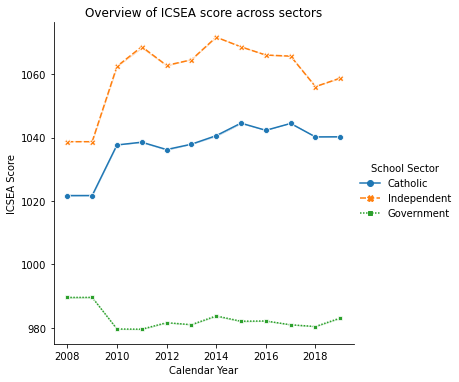

In [5]:
# Lets create our first visualisation

sns.relplot(x='Calendar Year', y='ICSEA', data=df, 
            kind='line', style='School Sector', hue='School Sector', 
            markers=True, ci=False)


plt.xlabel('Calendar Year')
plt.ylabel('ICSEA Score')
plt.title("Overview of ICSEA score across sectors")

plt.savefig("ICSEA_overview", dpi=400)
plt.show()

At face value we can notice some pretty amazing things, the difference is quite vast when looking from a distance, however the ICSEA Score is much tighter than it first appears. To further that this encompasses primary, high and combined institutes which is rather inaccurate to being with. 

Let's see if we can make something a touch more accurate by seperating the sectors out and obtaining a mean for the ICSEA Values.


In [6]:
icsea_df = df.groupby('School Sector')['ICSEA'].agg(['count', 'min', 'mean', 'median', 'max'])
icsea_df.reset_index(drop=False, inplace=True) # adding this to ensure we can call the school sector value

icsea_df

,School Sector,count,min,mean,median,max
0,Catholic,19493,100.0,1037.272252,1037.0,1246.0
1,Government,74655,180.0,982.816462,984.0,1390.0
2,Independent,11189,100.0,1060.176513,1065.0,1297.0


Interestingly by removing the calendar year we can start to get an overall picture that is far more understandable. 

Lets try and plot this using the median. 

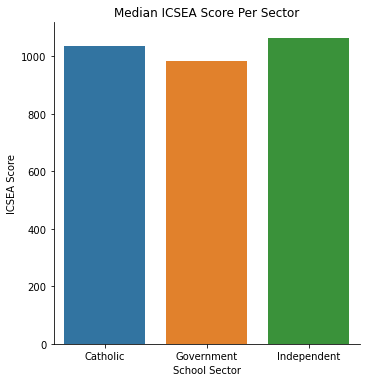

In [7]:
sns.catplot(x='School Sector', y='median', data=icsea_df, kind='bar')
plt.xlabel("School Sector")
plt.ylabel("ICSEA Score")
plt.title("Median ICSEA Score Per Sector")
plt.savefig("Median_ICSEA_score_per_sector.png", dpi=400)
plt.show()

Looking at the above we can see the sectors perform very closely, while an arguement could be made on which school to go to based on ICSEA scores alone, it doesnt seem to paint the full picture.  

onto question 2

## Question 2 - Does location or region matter to educational outcomes? 

For this question we will try and group the locations together to see if there is any disernable difference between them, lets begin!

In [8]:
geo_frequency = df['Geolocation'].value_counts()
geo_frequency

Major Cities      55690
Inner Regional    26363
Outer Regional    16747
Remote             3428
Very Remote        3109
Name: Geolocation, dtype: int64

In [9]:
geo_stats = df.groupby('Geolocation')['ICSEA'].agg(['count', 'min', 'mean', 'median', 'max'])
geo_stats.reset_index(drop=False, inplace=True)

geo_stats

,Geolocation,count,min,mean,median,max
0,Inner Regional,26363,123.0,987.725031,990.0,1218.0
1,Major Cities,55690,100.0,1039.055558,1037.0,1297.0
2,Outer Regional,16747,514.0,956.133218,965.0,1192.0
3,Remote,3428,277.0,924.887106,964.0,1231.0
4,Very Remote,3109,100.0,761.257961,717.0,1390.0


Looking at the above table there are a few things to note,
- The count of major cities entries dwarfs every other geolocation
- the median doesnt paint the whole picture

Lets see if we can visualise this better with a stacked bar plot.

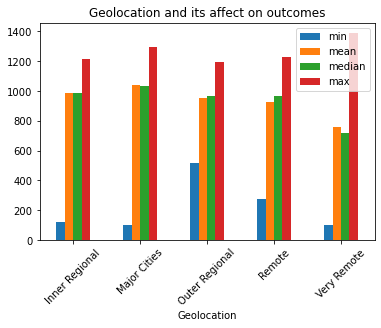

In [10]:
geo_stats.set_index('Geolocation').iloc[:, 1:].plot(kind='bar',
                                                    use_index=True,
                                                    rot=45,
                                                    title='Geolocation and its affect on outcomes');

Here we can see that even though the very remote regions overall performed slightly less than other regions, they hold the highest max ICSEA score. 


## Question 3 - Which state performs better?
When talking about location, the region is only part of the picture.  We can also look at how each State faired against the others. 

First let us explore which state had the most entries to better understand if there is any bias to our findings

In [11]:
state_df = df.groupby('State')['ICSEA'].agg(['count', 'min', 'mean', 'median', 'max'])
state_df.reset_index(drop=False, inplace=True) # adding this to ensure we can call the school sector value

state_df

,State,count,min,mean,median,max
0,ACT,1454,683.0,1082.796424,1087.0,1226.0
1,NSW,34972,515.0,1006.347192,1006.0,1297.0
2,NT,2031,100.0,772.194978,761.0,1390.0
3,QLD,19542,100.0,985.912854,986.0,1241.0
4,SA,8037,453.0,998.888889,1002.0,1208.0
5,TAS,2853,696.0,973.818086,967.0,1183.0
6,VIC,24715,588.0,1027.962371,1020.0,1247.0
7,WA,11733,381.0,991.917327,1005.0,1258.0


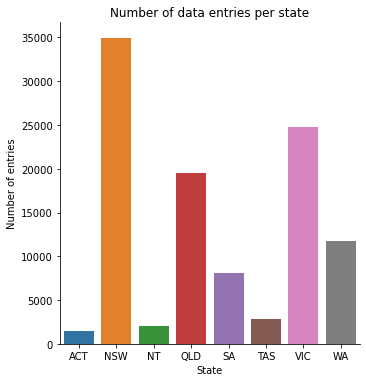

In [12]:
sns.catplot(x='State', y='count', data=state_df, kind='bar')
plt.xlabel('State')
plt.ylabel('Number of entries')
plt.title('Number of data entries per state')
plt.savefig("Number_of_data_entries_per_state.png", dpi=400)
plt.show()

From the above we can see that the three major states in education happen to be NSW followed by VIC and lastly QLD.  Lets get a more accurate picture with a boxplot


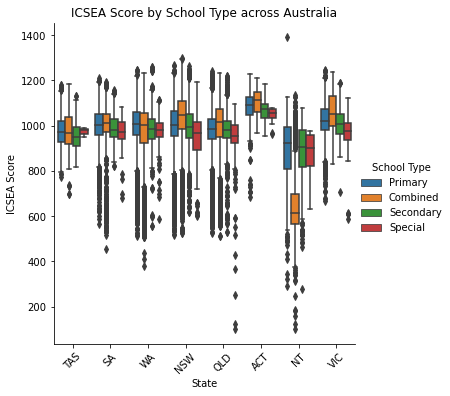

In [13]:
sns.catplot(x='State', 
            y='ICSEA', 
            data=df, 
            kind='box',
            hue='School Type')

# information about the chart
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("ICSEA Score")
plt.title("ICSEA Score by School Type across Australia")
plt.savefig("ICSEA_Score_by_School_Type_across_Australia.png", dpi=400)

plt.show()

and the winner is? 

## ACT

Each state is fairly close together however we can see that the ACT edges forward.  This doesnt paint the full picture however as if we remember above ACT, NT and TAS had the least amount of entries so this will skew the data. 

Furthermore as a QLD resident moving to these locations isnt feesable and this will have to be taken into account. 

Staying on the east coast will be the way to go so lets compare the top 3 contenders; QLD, NSW and VIC


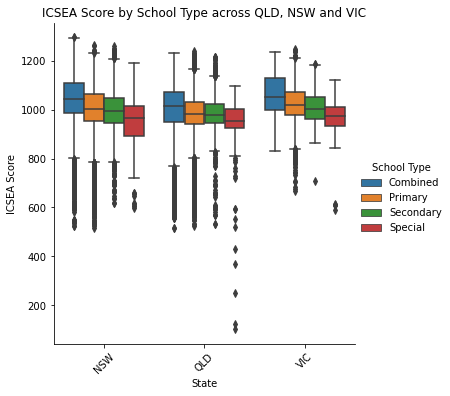

In [14]:
sns.catplot(x='State', 
            y='ICSEA', 
            data=df[(df['State'] == 'QLD') | (df['State'] == 'NSW') | (df['State'] == 'VIC')], 
            kind='box',
            hue='School Type')

# information about the chart
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("ICSEA Score")
plt.title("ICSEA Score by School Type across QLD, NSW and VIC")
plt.savefig("ICSEA_Score_by_School_Type_across_QLD_NSW_VIC.png", dpi=400)

plt.show()

Interestingly enough although being much closer VIC edges out just a little bit, with Combined schools (P-12) being the highest performing school overall. 

Lets take a closer look at VIC and see how each sector does

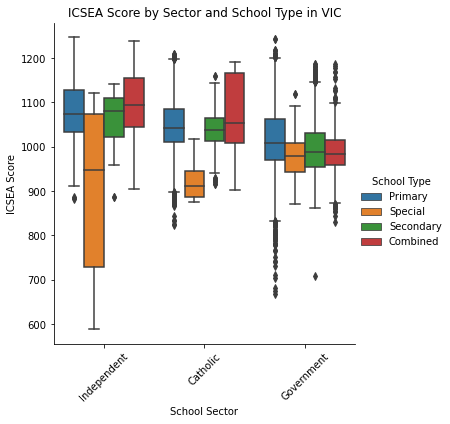

In [15]:
sns.catplot(x='School Sector', 
            y='ICSEA', 
            data=df[df['State'] == 'VIC'], 
            kind='box',
            hue='School Type')

# information about the chart
plt.xticks(rotation=45)
plt.xlabel("School Sector")
plt.ylabel("ICSEA Score")
plt.title("ICSEA Score by Sector and School Type in VIC")
plt.savefig("ICSEA_Score_by_Sector_and_School_Type_in_VIC.png", dpi=400)

plt.show()

We can note the outliers but for the most part can asertain the information we need. Judging by this we can see that combined Catholic schools in Victoria overall perform better when judging by the ICSEA score. 

Moving onwards to the next question

## Question 4 - Does gender play a role in learning outcomes? 


While gender should not be a defining factor in deciding a school, I am interested if it has a measurable difference. Lets see what we find.

In [18]:
p1 = figure(
        title="Boys Enrolments and ICSEA Score",
        plot_height=500,
        plot_width=600,
        y_axis_label='ICSEA Score',
        x_axis_label='Number of Boys Enrolled',
        
)

p1.circle(df['Boys Enrolments'], df['ICSEA'],color='navy', size=5, alpha=0.5)
output_file('boys enrolments.html')

p2 = figure(
        title="Girls Enrolments and ICSEA Score",
        plot_height=500,
        plot_width=600,
        y_axis_label='ICSEA Score',
        x_axis_label='Number of Girls Enrolled',
        
)
p2.circle(df['Girls Enrolments'], df['ICSEA'],color='#FF8B61', size=5, alpha=0.5)
output_file('girls enrolments.html')

row_layout1 = row(p1, p2)
output_file('ICSEA_by_Gender.html')
show(row_layout1)

Looking at the above information, there appears to be a trend where the more students enroled regardless of gender, the greater on average the ICSEA score becomes.  This looks to reach an upper threshold with diminishing returns afterwards. 

Lets see if gender has any significance over school sector

In [19]:
school_sector = ['Independent', 'Catholic', 'Government']
MARKERS = ['hex', 'circle_x', 'triangle']



p3 = figure(
        title="Boys Enrolments and ICSEA Score across School Sectors",
        plot_height=500,
        plot_width=600,
        y_axis_label='Number of Boys Enrolled',
        x_axis_label='ICSEA Score',
        
)

p3.scatter('ICSEA', 'Boys Enrolments', source=df, legend_field='School Sector', fill_alpha=0.4, size=4,
          marker=factor_mark('School Sector', MARKERS, school_sector),
          color=factor_cmap('School Sector', 'Category10_3', school_sector))

p4 = figure(
        title="Girls Enrolments and ICSEA Score across School Sectors",
        plot_height=500,
        plot_width=600,
        y_axis_label='Number of Girls Enrolled',
        x_axis_label='ICSEA Score',
        
)

p4.scatter('ICSEA', 'Girls Enrolments', source=df, legend_field='School Sector', fill_alpha=0.4, size=4,
          marker=factor_mark('School Sector', MARKERS, school_sector),
          color=factor_cmap('School Sector', 'Category10_3', school_sector))

row_layout2 = row(p3, p4)
output_file('Gender_across_sectors_measured_by_ICSEA.html')
show(row_layout2)

Interestingly enough the trend between sectors for both male and female students appears to be pretty consistant.  A few outliers here and there but for the most part we can say that gender does not conclusively result in different learning outcomes. 

## Question 5 - Which school would I choose for my Daughter? 

If we are going by the above data then we would choose a Catholic Combined school in a NSW Major City.  The caviet to this is that an ICSEA score does not paint a picture on how good a school will be for a child.  There are many other factors that come into play, travel time, extra curricular offerings, beleifs, affordability etc.  The list goes on. 

While not a conclusive way to show "Which school is best" it is interesting to dive into various aspects of Australian Schooling between 2008 - 2019.  

We have barely scratched the surface however, and in the future I would love to dive further in to education in Australia and see what we can visually scuplt in the future